## Linear Neural Unit with Least Squares

LNU ... Linear Neural Unit

$\tilde{\textbf{y}} =\textbf{X}^T\cdot\textbf{w}^T$

where $\tilde{\textbf{y}}$ is vector (1-D array) of all outputs of a neuron (in code it is as $y_n$)

$\textbf{w}^T=inv(\textbf{X}^T \cdot \textbf{X})\cdot \textbf{X}^T \cdot \textbf{y}
$


In the example bellow, output $y$ is calculated using two input variables $u_1$ and $u_2$ with their time embedding of 2 samples (i..e two samples back of $u_1$ and $u_2$).
So the feature vector is $\textbf{x}=[1 \ u_1(k-1) \  u_1(k-2) \ u_1(k-1) \ u_2(k-2)]$.
Linear neuron then calculates every single $y(k)$ as $y(k)=\textbf{w}\cdot\textbf{x}$ and for all of them as above.

In the example bellow, notice the data normalization and denormalizaton. Also, notice that the linear neuron can not learn the noise (beacuse the noise is a nonlinear phenomenom), and because the feature vector here corresponds to data behavior, then the trained linear neuron is able to learn proper behavior from noisy data (if we used nonlinear neuron, it will learn noise as well, which will be incorrect in this case)

In [ ]:
#%matplotlib widget
from numpy import *
from matplotlib.pyplot import *
## measuring data
#N=100
nu1=2
nu2=2
ny=2
n=1+nu1+nu2

t=arange(0,60,.1)
N=len(t)
u1=sin(2*pi/6*t)
u2=random.randn(N)
y=zeros(N)
X=ones((N,n))
ytrue=zeros(N)



In [ ]:
X.shape

(600, 5)

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
595,1.0,1.0,1.0,1.0,1.0
596,1.0,1.0,1.0,1.0,1.0
597,1.0,1.0,1.0,1.0,1.0
598,1.0,1.0,1.0,1.0,1.0


In [ ]:
u1.shape

(600,)

In [ ]:
u2.shape

(600,)

In [ ]:
for k in range(2,N):
  ytrue[k]=2+3*u1[k-1]-2*u1[k-2]+2*u2[k-1]-2*u2[k-2]  # data behavior
  y[k]=ytrue[k]+random.randn()   # "measuring" real output with noise


In [ ]:
ytrue.shape

(600,)

In [ ]:
y.shape

(600,)

In [ ]:
u1.max()

0.4714045207910316

In [ ]:
u2.shape

(600,)

In [ ]:

u1=(u1-mean(u1))/std(u1)/3
u2=(u2-mean(u2))/std(u2)/3


In [ ]:

meany=mean(y)
stdy=std(y)

y=(y-meany)/stdy/3


In [ ]:
y.shape

(600,)

In [ ]:

for k in range(2,N):
    #filling X matrix
    X[k,1]=u1[k-1]
    X[k,2]=u1[k-2]
    X[k,3]=u2[k-1]
    X[k,4]=u2[k-2]


In [ ]:
pd.DataFrame(X)

,0,1,2,3,4
0,1.0,1.000000,1.000000e+00,1.000000,1.000000
1,1.0,1.000000,1.000000e+00,1.000000,1.000000
2,1.0,0.049275,1.856659e-17,-0.205325,0.025090
3,1.0,0.098011,4.927519e-02,0.591091,-0.205325
4,1.0,0.145672,9.801051e-02,0.155580,0.591091
...,...,...,...,...,...
595,1.0,-0.277085,-3.154312e-01,-0.108873,-0.350882
596,1.0,-0.235702,-2.770846e-01,0.112694,-0.108873
597,1.0,-0.191737,-2.357023e-01,0.202511,0.112694
598,1.0,-0.145672,-1.917375e-01,-0.135573,0.202511


In [ ]:

#====LNU with Least Squares

X=X[2:,:]
y=y[2:]

In [ ]:

ytrue=ytrue[2:]
ytrue.shape

(594,)

In [ ]:

w=dot(dot(linalg.inv(dot(X.T,X)),X.T),y)
w

array([ 4.17669200e-04,  5.41713032e-01, -2.86679138e-01,  6.48392791e-01,
       -6.41214445e-01])

In [ ]:

yn=dot(X,w)   # neuron output

yn=yn*3*stdy+meany  # returning to original scale of data
y=y*3*stdy+meany

e=y-yn
etrue=ytrue-yn

figure()
subplot(311)
plot(y,'b',label="$y$...real with noise")
plot(ytrue,'m',label="$y_{true}$...without noise")
plot(yn,'g',label="$y_n$...neuron");legend()
subplot(312)
plot(e,'r',label="e")
plot(etrue,'m',label="$e_{true}=y_{true}-y{n}$");legend()
subplot(313)
plot(w,'o');grid()
show()


There are measured data of four control signals for propellers motors (crazy fly drone) and the batery status, i.e., voltage.

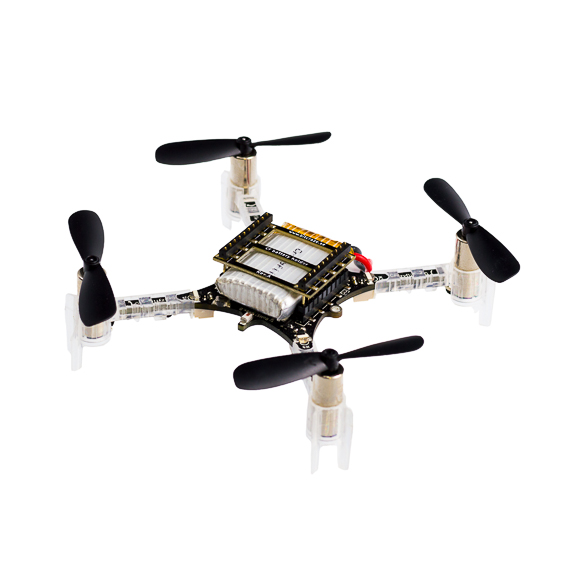




## Task 1
Use data from "battery_motor_log_example1 (no time specified).xls" where we assume data are sampled with constant sampling (if sampling is not constant, you can not train a prediction model with constant prediction horizon, here one sample).
<ul>
    <li>
Apply Linear Neuron and Least Squares direct weight calculation (the simplest one) to predict the batery status. For the beginning, try time embedding be 2 for all input variables to your neuron. Apply also data normalization before training, divide data to training data and testing data to validate how your model works for batery status prediction <b style="color:blue;">[0.5 Points]</b>
   </li>
   <li>
       Compare in more detail neural output $y_n$ and real target $y$ and calculate the  Pearson's correlation coefficients of neuron output and target data (do it both for training and testing data) . <b style="color:blue;">[0.2 Points]</b>
   </li>
</ul>


Correlation coefficient for training data: 0.3905581028967746
Correlation coefficient for testing data: 0.6807223831889794


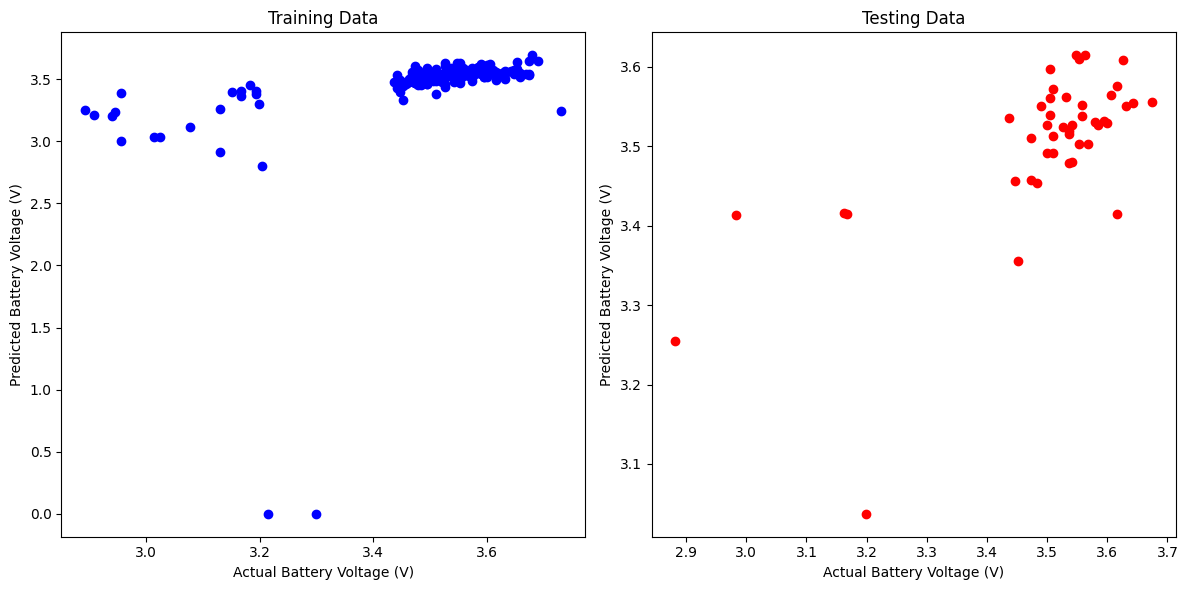

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Load data from Excel file
data_frame = pd.read_csv('/content/battery_motor_log_example1 (no time specified).csv',)

data_frame = data_frame.drop('sample index', axis=1)
data_frame = data_frame[data_frame != 0.0].dropna(axis=0)

# Extract features and target (battery status)
X = data_frame.drop(['Battery voltage (V)'], axis=1)  # Features (all columns except the target)
y = data_frame['Battery voltage (V)']  # Target variable

# Apply data normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Create feature vectors with a time embedding of 2
X_emb = np.zeros((len(X), 9))  # 9 = 4 input variables * 2 time steps + 1 for bias
for i in range(2, len(X)):
    X_emb[i] = [1, X_normalized[i-1, 0], X_normalized[i-2, 0], X_normalized[i-1, 1], X_normalized[i-2, 1],
                X_normalized[i-1, 2], X_normalized[i-2, 2], X_normalized[i-1, 3], X_normalized[i-2, 3]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_emb, y, test_size=0.2, random_state=42)

# Calculate weights using least squares
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y_train)

# Predict battery status (neuron output) for training and testing data
y_train_pred = np.dot(X_train, w)
y_test_pred = np.dot(X_test, w)

# If data was normalized, denormalize predictions
y_train_pred = y_train_pred.reshape(-1, 1)
y_test_pred = y_test_pred.reshape(-1, 1)

# Calculate Pearson's correlation coefficients
corr_train, _ = pearsonr(y_train_pred.flatten(), y_train)
corr_test, _ = pearsonr(y_test_pred.flatten(), y_test)

print("Correlation coefficient for training data:", corr_train)
print("Correlation coefficient for testing data:", corr_test)

# Plot graphs to visualize the results
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel("Actual Battery Voltage (V)")
plt.ylabel("Predicted Battery Voltage (V)")
plt.title("Training Data")

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red')
plt.xlabel("Actual Battery Voltage (V)")
plt.ylabel("Predicted Battery Voltage (V)")
plt.title("Testing Data")

plt.tight_layout()
plt.show()



## Task 2
  - Repeat the above <b>Task 1</b> for dataset in "battery_motor_log(time specified).csv". The reason is that the data might not be sampled with constant sampling, so you have to verify if the sampling is both constant and same for all data. If sampling is not constant, interpolate data so you get data with constant sampling (and repeat tasks from Assignment 1)
   
  - Carry out a study for increased time embeddings (1,2,3,4...?) in feature vector, and observe its effect on training accuracy and on testing accuracy, e.g., via Mean Square Error, or other error criterion.



Found 156 invalid rows. Dropping them...


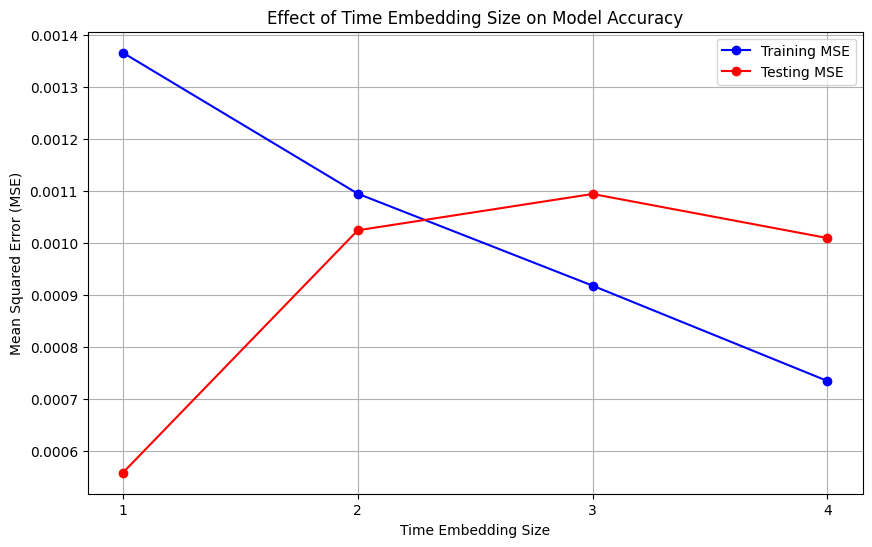

Time Embedding Size 1:
   Training MSE: 0.0013662636555874265
   Testing MSE : 0.0005575856474476054

Time Embedding Size 2:
   Training MSE: 0.0010948851276523408
   Testing MSE : 0.0010243360853840367

Time Embedding Size 3:
   Training MSE: 0.0009177717251840951
   Testing MSE : 0.0010942971958996268

Time Embedding Size 4:
   Training MSE: 0.000734253032645914
   Testing MSE : 0.0010094297041491995



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/battery_motor_log(time specified).csv', parse_dates=[['Date', 'Time']], na_values=['nan nan'])

# Convert Date_Time column to datetime format
data['Date_Time'] = pd.to_datetime(data['Date_Time'], errors='coerce')

# Check for rows where Date_Time is NaT (Not a Time, i.e., invalid datetime)
invalid_rows = data[data['Date_Time'].isnull()]
if not invalid_rows.empty:
    print(f"Found {len(invalid_rows)} invalid rows. Dropping them...")
    data = data.drop(invalid_rows.index)

# Check if sampling interval is constant
time_diff = data['Date_Time'].diff().mean()
if not pd.Timedelta(seconds=1) == time_diff:
    # Interpolate to achieve constant sampling interval (1 second in this case)
    data = data.set_index('Date_Time').resample('1S').mean().interpolate(method='linear')

# Reset index after interpolation
data = data.reset_index()

# Select relevant columns for modeling
X = data[['Motor1 PWM', 'Motor2 PWM', 'Motor3 PWM', 'Motor4 PWM']].values
y = data['Battery voltage (V)'].values

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Function to create feature matrix with specified time embedding
def create_feature_matrix(X_norm, embedding_size):
    n_samples, n_features = X_norm.shape
    X_emb = np.zeros((n_samples - embedding_size, n_features * embedding_size + 1))
    for i in range(embedding_size, n_samples):
        # Create feature vector with embedding_size
        X_emb[i - embedding_size, 0] = 1  # Bias term
        for j in range(embedding_size):
            X_emb[i - embedding_size, j * n_features + 1:(j + 1) * n_features + 1] = X_norm[i - j - 1]
    return X_emb

# List of time embeddings to evaluate
embedding_sizes = [1, 2, 3, 4]

# Initialize lists to store results
mse_train = []
mse_test = []

# Iterate over different embeddings
for emb_size in embedding_sizes:
    # Create feature matrix with current embedding size
    X_emb = create_feature_matrix(X_normalized, emb_size)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_emb, y[emb_size:], test_size=0.2, random_state=42)

    # Calculate weights using least squares
    w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y_train)

    # Predict battery voltage for training and testing data
    y_train_pred = np.dot(X_train, w)
    y_test_pred = np.dot(X_test, w)

    # Calculate Mean Squared Error (MSE) for training and testing data
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Plot MSE versus time embedding size
plt.figure(figsize=(10, 6))
plt.plot(embedding_sizes, mse_train, marker='o', linestyle='-', color='b', label='Training MSE')
plt.plot(embedding_sizes, mse_test, marker='o', linestyle='-', color='r', label='Testing MSE')
plt.title('Effect of Time Embedding Size on Model Accuracy')
plt.xlabel('Time Embedding Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(embedding_sizes)
plt.legend()
plt.grid(True)
plt.show()

# Print MSE values for each embedding size
for i, emb_size in enumerate(embedding_sizes):
    print(f"Time Embedding Size {emb_size}:")
    print(f"   Training MSE: {mse_train[i]}")
    print(f"   Testing MSE : {mse_test[i]}\n")


### Explanation:

- **Loading and Preparing Data:**
  - The dataset is loaded from "battery_motor_log(time specified).csv".
  - Date and Time columns are converted to a single DateTime format and checked for constant sampling interval. If not constant, data is interpolated to achieve uniform sampling.

- **Linear Neuron and Least Squares Calculation:**
  - Data is normalized using `StandardScaler`.
  - Feature vectors are constructed with varying time embeddings (`embedding_sizes`).

- **Evaluate Different Time Embeddings:**
  - For each embedding size, the model is trained using Linear Neuron and Least Squares.
  - Mean Squared Error (MSE) is calculated for both training and testing datasets to evaluate model performance.

- **Visualize Results:**
  - MSE values are plotted against different embedding sizes to observe the effect of embedding size on model accuracy.


 exploring the impact of time embeddings on predictive accuracy and ensuring the dataset is effectively prepared for training and evaluation using Linear Neuron with Least Squares. Adjustments can be made to further optimize or expand the analysis based on specific requirements or additional insights.